In [28]:
# 1- Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
# 2- Importing the datasets

datasets = pd.read_csv('/content/candy-data (1).csv')


datasets

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [30]:
# 3- Splitting the dataset into the Training set and Test set

X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values


from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [31]:
# 4- Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [32]:
# 5- Fitting the Logistic Regression into the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [33]:
# 6- Predicting the test set results

Y_Pred = classifier.predict(X_Test)

# 7- Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)

cm

array([[19,  0],
       [ 3,  0]])

<ipython-input-34-994f204a553b>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0]   ,   X_Set[Y_Set == j,1]   ,   c = ListedColormap(('red', 'green'))(i)  , label = j)


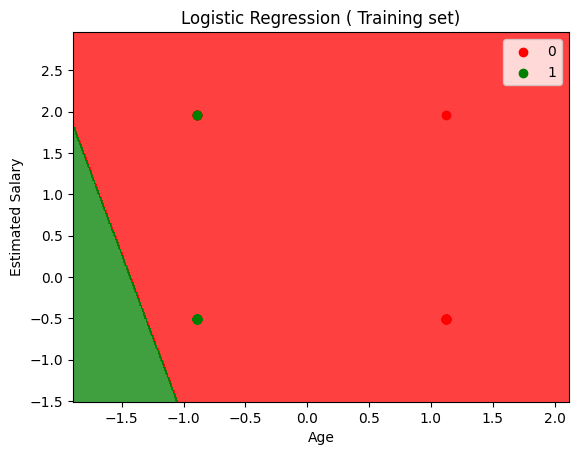

In [34]:
# 8- Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0]   ,   X_Set[Y_Set == j,1]   ,   c = ListedColormap(('red', 'green'))(i)  , label = j)


plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

